In [1]:
import os
import darklim
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

from scipy.interpolate import interp1d

##### Just to test things, lets take an event spectrum from LBNL HeRALD run 7 where we know we had a ton of LEE. We'll take this spectrum and just try and compute a limit. Since we don't have an expected background spectrum, we'll use Yellin's optimum interval method to compute the limit. This method is ideal when there is low number of events in the ROI, which is not the case here, but we just want to test the code.

##### Then, when we get a clean spectrum from Pyle Run 46/47, we will do the same thing and compute a limit. After that, it will be worth putting in a little work to try and estimate a radiogenic background and LEE spectrum to then use a Feldman-Cousins liklihood analysis to compute the limit.

In [2]:
r7_spectrum = np.load('/home/mwilliams/LBNL_HeRALD/run7and9/r7spectrum.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/home/mwilliams/LBNL_HeRALD/run7and9/r7spectrum.npy'

In [ ]:
r7_spectrum_kev = r7_spectrum*1e-3 #put energies in kev

In [ ]:
energyrange = np.arange(r7_spectrum_kev.min(), r7_spectrum_kev.max(),5e-4)

In [ ]:
cutefficiency = np.full(56,57)#57% cut efficiency

In [2]:
DMmasses = np.geomspace(0.01, 2, num=25)
exposure = 0.00000648#for 40 minutes of data, and lets assume a cm^2 device is 0.24g. So that would be 0.027*0.24e-3 kgday
resolution = 528e-6 #in units of kev. Assume 25% PCE for the device and take  the measured resolution of 132 meV
threshold = 528e-6 * 5

In [3]:
sig,ol1,ol2 = darklim.limit.optimuminterval(r7_spectrum_kev,energyrange,cutefficiency,DMmasses,exposure,res=resolution,verbose=True,hard_threshold=threshold)

NameError: name 'r7_spectrum_kev' is not defined

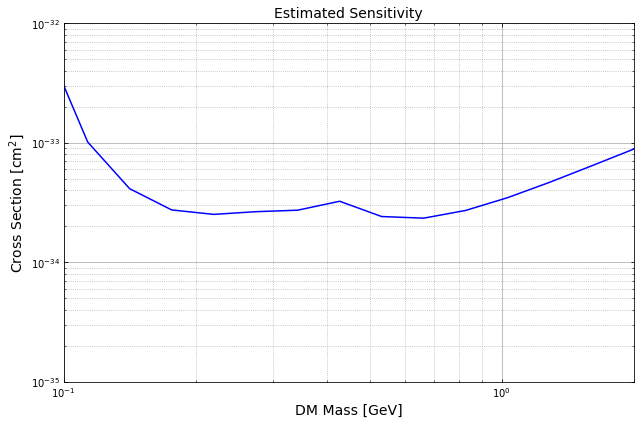

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.loglog(DMmasses, sig, color='b')

ax.set_ylim(1e-35, 1e-32)
ax.set_xlim(0.1, 2)
ax.set_xlabel("DM Mass [GeV]", fontsize=14)
ax.set_ylabel("Cross Section [cm$^2$]", fontsize=14)
ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid()
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

fig.tight_layout()

Now do this with the run 46 data with no salt and no LEE spectrum

In [4]:
bigfinsspectra = np.load('/home/michael/DarkLim/examples/spectra/energies_025_bigfins.npy')
normfinsspectra = np.load('/home/michael/DarkLim/examples/spectra/energies_025_regular.npy')
bigfinsspectra_kev = bigfinsspectra*1e-3
normfinsspectra_kev = normfinsspectra*1e-3
DMmasses = np.geomspace(0.01, 2, num=25)

In [5]:
regbins, regedges = np.histogram(normfinsspectra,bins = 200,range = (0,40)) #do the histogramming of the actual random data
regbin_widths = np.diff(normfinsspectra)
bigbins, bigedges = np.histogram(bigfinsspectra,bins = 200,range = (0,40)) #do the histogramming of the actual random data
bigbin_widths = np.diff(bigfinsspectra)

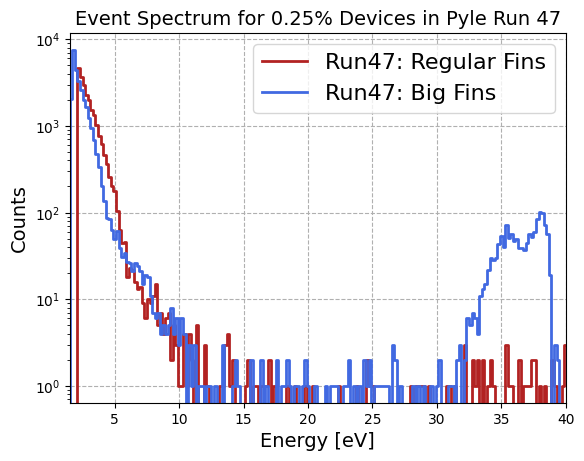

In [6]:
plt.step(regedges[1:],regbins, where='mid',label='Run47: Regular Fins',linewidth=2,color='firebrick') #plot the hist and fit together 
plt.step(bigedges[1:],bigbins, where='mid',label='Run47: Big Fins',linewidth=2,color='royalblue') #plot the hist and fit together 
plt.yscale('log')
#plt.ylim(1e-4,1e0)
plt.xlim(1.5,40)
plt.title(f'Event Spectrum for 0.25% Devices in Pyle Run 47',fontsize = 14)
plt.ylabel('Counts',fontsize = 14)
plt.xlabel('Energy [eV]',fontsize = 14)
#plt.vlines(2200,ymin=0,ymax=10e5,colors='r', label='cut')
plt.grid(linestyle="dashed")
plt.legend(fontsize = 16)

In [7]:
energyrange_big = np.arange(bigfinsspectra_kev.min(), bigfinsspectra_kev.max(),5e-4)
energyrange_reg = np.arange(normfinsspectra_kev.min(), normfinsspectra_kev.max(),5e-4)
cutefficiency_big = np.full(76,0.5673456790123457)#56% cut efficiency
cutefficiency_reg = np.full(107,0.33287654320987653)#33% cut efficiency
resolution_big = 314e-6 #in units of kev. 
threshold_big = 314e-6 * 5
resolution_reg = 397e-6 #in units of kev.
threshold_reg = 397e-6 * 5
exposure_r46 = 0.00009#for 540 minutes of data, and lets assume a cm^2 device is 0.24g. So that would be 0.375*0.24e-3 kgday


In [8]:
314e-6 * 5

0.00157

In [9]:
397e-6 * 5

0.001985

In [10]:
sig_big,ol1_big,ol2_big = darklim.limit.optimuminterval(bigfinsspectra_kev,energyrange_big,cutefficiency_big,DMmasses,exposure_r46,res=resolution_big,verbose=True,hard_threshold=threshold_big)
sig_reg,ol1_reg,ol2_reg = darklim.limit.optimuminterval(normfinsspectra_kev,energyrange_reg,cutefficiency_reg,DMmasses,exposure_r46,res=resolution_reg,verbose=True,hard_threshold=threshold_reg)

On mass 1 of 25.
On mass 2 of 25.
On mass 3 of 25.
On mass 4 of 25.
On mass 5 of 25.
On mass 6 of 25.
On mass 7 of 25.
On mass 8 of 25.
On mass 9 of 25.
15024.4951171875
15024.4951171875
On mass 10 of 25.
16007.087890625
16007.087890625
On mass 11 of 25.
18691.41796875
18691.41796875
On mass 12 of 25.
14663.998046875
14663.998046875
On mass 13 of 25.
5200.21533203125
5200.21533203125
On mass 14 of 25.
2749.2607421875
2749.2607421875
On mass 15 of 25.
915.9776000976562
915.9776000976562
On mass 16 of 25.
342.9810485839844
342.9810485839844
On mass 17 of 25.
213.3109130859375
213.3109130859375
On mass 18 of 25.
180.1863555908203
180.1863555908203
On mass 19 of 25.
175.5362091064453
175.5362091064453
On mass 20 of 25.
174.47286987304688
174.47286987304688
On mass 21 of 25.
175.33778381347656
175.33778381347656
On mass 22 of 25.
172.76898193359375
172.76898193359375
On mass 23 of 25.
171.45530700683594
171.45530700683594
On mass 24 of 25.
170.76205444335938
170.76205444335938
On mass 25 of

In [11]:
DMmasses #GeV

array([0.01      , 0.01247028, 0.01555079, 0.01939227, 0.02418271,
       0.03015652, 0.03760603, 0.04689578, 0.05848035, 0.07292665,
       0.09094158, 0.11340671, 0.14142136, 0.17635641, 0.2199214 ,
       0.27424818, 0.34199519, 0.42647762, 0.53182959, 0.66320646,
       0.82703711, 1.03133854, 1.28610817, 1.60381306, 2.        ])

In [12]:
ol1_big

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0017781 , 0.00189863,
       0.00194597, 0.00394443, 0.00431213, 0.00528576, 0.01021874,
       0.01021874, 0.01119964, 0.01119964, 0.01119964, 0.01119964,
       0.01119964, 0.01160431, 0.01160431, 0.01160431, 0.01160431])

In [13]:
ol1_reg

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00222546,
       0.00253528, 0.0026126 , 0.00529272, 0.00579496, 0.00919534,
       0.0096084 , 0.0113965 , 0.01683256, 0.01683256, 0.01683256,
       0.01683256, 0.01732175, 0.01732175, 0.01732175, 0.01732175])

In [14]:
ol2_big

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.001909  , 0.00202935,
       0.00222483, 0.00453712, 0.00502884, 0.00645616, 0.01414   ,
       0.01636206, 0.0174497 , 0.0174497 , 0.02296311, 0.02296311,
       0.03097747, 0.03097747, 0.03097747, 0.03097747, 0.03097747])

In [15]:
ol2_reg

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00240528,
       0.00270719, 0.00320771, 0.00731923, 0.00752593, 0.01338421,
       0.02237243, 0.02446057, 0.02799456, 0.02799456, 0.02799456,
       0.02799456, 0.02799456, 0.02799456, 0.02799456, 0.02799456])

In [16]:
DMmasses

array([0.01      , 0.01247028, 0.01555079, 0.01939227, 0.02418271,
       0.03015652, 0.03760603, 0.04689578, 0.05848035, 0.07292665,
       0.09094158, 0.11340671, 0.14142136, 0.17635641, 0.2199214 ,
       0.27424818, 0.34199519, 0.42647762, 0.53182959, 0.66320646,
       0.82703711, 1.03133854, 1.28610817, 1.60381306, 2.        ])

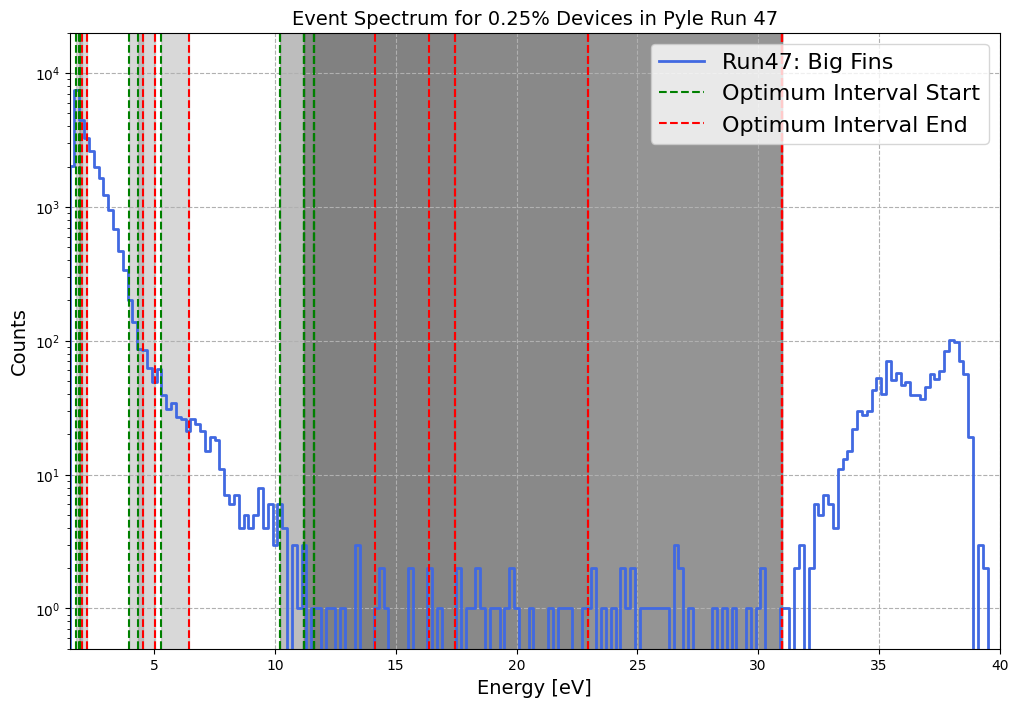

In [17]:
plt.figure(figsize=(12, 8))
plt.step(bigedges[1:],bigbins, where='mid',label='Run47: Big Fins',linewidth=2,color='royalblue') #plot the hist and fit together 
plt.yscale('log')
for i in range(len(ol1_big)):
    plt.axvline(x=ol1_big[i]*1e3, color='g', linestyle='--', label='Optimum Interval Start' if i == 0 else "")
    plt.axvline(x=ol2_big[i]*1e3, color='r', linestyle='--', label='Optimum Interval End' if i == 0 else "")
    plt.fill_betweenx([0, 5e5], ol1_big[i]*1e3, ol2_big[i]*1e3, color='gray', alpha=0.3)
plt.ylim(0.5,2e4)
plt.xlim(1.5,40)
plt.title(f'Event Spectrum for 0.25% Devices in Pyle Run 47',fontsize = 14)
plt.ylabel('Counts',fontsize = 14)
plt.xlabel('Energy [eV]',fontsize = 14)
#plt.vlines(2200,ymin=0,ymax=10e5,colors='r', label='cut')
plt.grid(linestyle="dashed")
plt.legend(fontsize = 16)

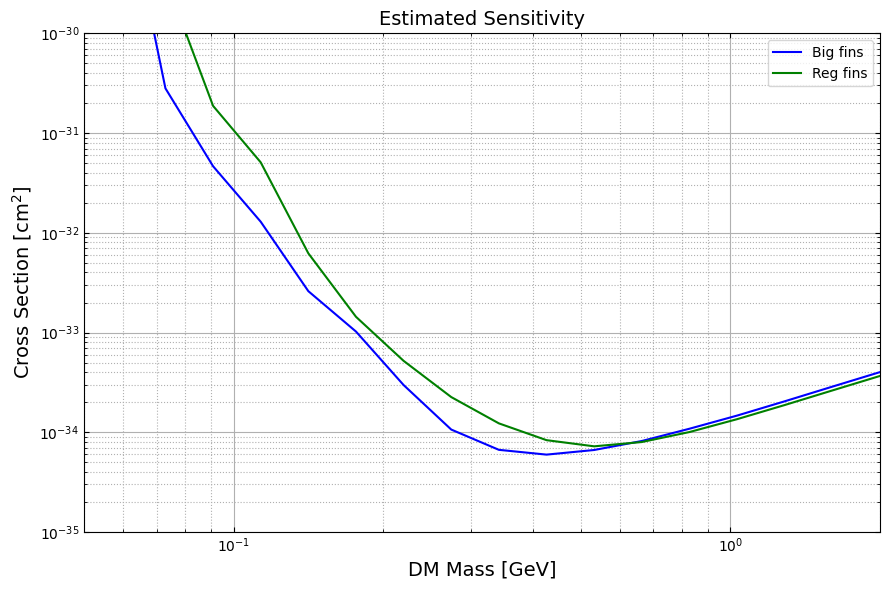

In [18]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.loglog(DMmasses, sig_big, color='b',label="Big fins")
ax.loglog(DMmasses, sig_reg, color='g',label="Reg fins")

ax.set_ylim(1e-35, 1e-30)
ax.set_xlim(0.05, 2)
ax.set_xlabel("DM Mass [GeV]", fontsize=14)
ax.set_ylabel("Cross Section [cm$^2$]", fontsize=14)
ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid()
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)
ax.legend()

fig.tight_layout()

In [19]:
#x1tmig = np.loadtxt('/global/cfs/cdirs/lz/users/haselsco/TESSERACT_Limits/snowmass2021-wp-cf1-neutrinofloor/data/published/SI/XENON1T-Migdal.txt')

def extrapolate(data, mass=1e6):
    m0, s0 = data[-1]
    return np.concatenate([data,[[mass, s0*mass/m0]]], axis=0)

def minbound(curves, masses=None):
    if masses is None:
        masses = np.logspace(-2, 4, 200)
    result = np.array([np.nan]*len(masses))
    for curve in curves:
        if curve[-1][0] < masses[-1]:
            curve = extrapolate(curve, masses[-1])
        yinterp = 10**(interp1d(*(np.log10(curve).T), bounds_error=False)(np.log10(masses)))
        #yinterp = interp1d(*(curve.T), bounds_error=False)(masses)
        result = np.nanmin([result, yinterp], axis=0)
    return np.array([masses, result]).T

def load_and_plot_existing(ax, leg=True,lw=1,leg_params=None):
    curves_dir = 'ExistingLimits/'
    m_lim, x_lim = np.loadtxt(curves_dir + 'CRESST_III_2019.txt').transpose()
    l1, = ax.plot(m_lim, x_lim, '--', color='#CFC0E5', lw=lw, label='CRESST-III 2019')
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'DAMIC_2020.txt').transpose()
    l2, = ax.plot(m_lim, x_lim, '--', color='#CE977A', lw=lw, label='DAMIC 2020')
    
    #m_lim, x_lim = np.loadtxt(curves_dir + 'Cosmic_Rays_2018.txt').transpose()
    #ax.plot(m_lim, x_lim, '--', color='#C9C0E5', lw=2, label='Cosmic Rays 2018')
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'CDMSlite_2019.txt').transpose()
    l3, = ax.plot(m_lim, x_lim, '--', color='#a4dbed', lw=lw, label='CDMSlite 2019')
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'XENON1T_Migdal_2019.txt').transpose()
    l4, = ax.plot(m_lim, x_lim, '--', color='#CA778C', lw=lw, label='XENON1T Migdal 2019')
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'CRESSTIII-Si-2022_cm.txt').transpose()
    l5, = ax.plot(m_lim, x_lim, '--', color='#C3B02F', lw=lw, label='CRESST-III 2023')
    
    #m_lim, x_lim = np.loadtxt(curves_dir + 'CRESST_Surface_2017.txt').transpose()
    #l5, = ax.plot(m_lim, x_lim, '--', color='#C3B02F', lw=lw, label='nu-cleus 2017')
    
    #m_lim, x_lim = np.loadtxt(curves_dir + 'PandaX4T_Migdal_2023.txt').transpose()
    #l5, = ax.plot(m_lim, x_lim, '--', color='darkgrey', lw=lw, label='PandaX-4T Migdal 2023') #color='#C3B02F'
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'XENON1T_S2Only_2019.txt').transpose()
    l6, = ax.plot(m_lim, x_lim, '--', color='#56872C', lw=lw, label='XENON1T S2-Only 2019')
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'EDELWEISS_Migdal_2019.txt').transpose()
    l7, = ax.plot(m_lim, x_lim, '--', color='#D7ADB7', lw=lw, label='EDELWEISS Migdal 2019')
    
    #m_lim, x_lim = np.loadtxt(curves_dir + 'LZ_SI_2022.txt').transpose()
    #l8, = ax.plot(m_lim, x_lim, '--', color='#bcced4', lw=lw, label='LZ 2022')
    
    m_lim, x_lim = np.loadtxt(curves_dir + 'Darkside50_Migdal_2023.txt').transpose()
    l9, = ax.plot(m_lim, x_lim, '--', color='#a4bd8e', lw=lw, label='DarkSide-50 2023')
    
    if leg:
        leg1 = ax.legend(handles=[ l9, l1, l2, l3, 15, l4, l6, l7], **leg_params)
        ax.add_artist(leg1)
    
    return

In [20]:
def plotexcludedsi(ax, details=False, **kwargs):
    curves_dir = 'ExistingLimits/'
    xs2o = np.loadtxt(curves_dir + 'XENON1T_S2Only_2019.txt')
    dsmig = np.loadtxt(curves_dir + 'Darkside50_Migdal_2023.txt')
    #pxmig = np.loadtxt(curves_dir + 'PandaX4T_Migdal_2023.txt')
    data = minbound([xs2o,dsmig], masses=None)#data.T[0])
    kwargs.setdefault('edgecolor', None)
    kwargs.setdefault('facecolor','#000000')
    kwargs.setdefault('alpha',0.05)
    #data = extrapolate(data, 1e5)
    ax.fill_between(*(data.T), ax.get_ylim()[1], **kwargs)
    if details:
        load_and_plot_existing(ax,leg=False,lw=1)

/tmp/ipykernel_2419748/982647761.py:16: RuntimeWarning: All-NaN axis encountered
  result = np.nanmin([result, yinterp], axis=0)


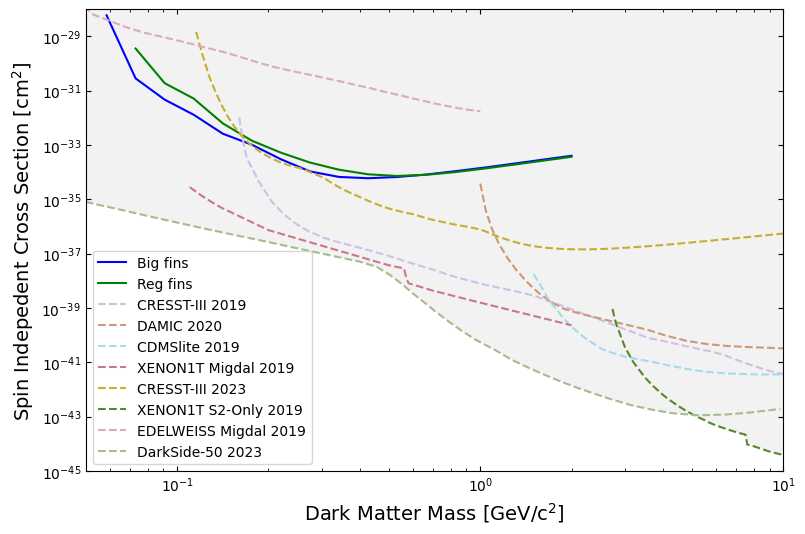

In [21]:
# money plot of sorts... selected run times 
#colors = cmap(np.linspace(0.5, 1, n_lines))

lss = ['--','-.','-']
    
fig, ax = plt.subplots(figsize=(9, 6))
ax.loglog(DMmasses, sig_big, color='b',label="Big fins")
ax.loglog(DMmasses, sig_reg, color='g',label="Reg fins")
plotexcludedsi(ax, details=False)
load_and_plot_existing(ax,leg=False,lw=1.5,leg_params={'loc':'upper right','frameon':False,'handlelength':1.5 } )
#ax.set_title('{:0.1f} g LHe; {:0.0f} days; {:0.1f} g-day'.format(mass_det*1e3,times[i],mass_det*1e3*times[i]))
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-45, 1e-28)
ax.set_xlim(0.05, 10)
ax.set_xlabel("Dark Matter Mass [GeV/c$^2$]", fontsize=14)
ax.set_ylabel("Spin Indepedent Cross Section [cm$^2$]", fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)
ax.legend(loc='lower left')
#ax.legend(handles=leg_hands,loc='upper left',frameon=True,ncol=1,title='{:d} Devices'.format(n_devices)) #bbox_to_anchor=(0.5, 1.05)

Now do some checks of the run 47 data

In [2]:
bigfinsshared = np.load('/home/michael/DarkLim/examples/spectra/BigFins_shared_0719.npy')
bigfinsall = np.load('/home/michael/DarkLim/examples/spectra/BigFins_all_0719.npy')
bigfinsshared_kev = bigfinsshared*1e-3
bigfinsall_kev = bigfinsall*1e-3

In [3]:
sharedbins, sharededges = np.histogram(bigfinsshared,bins = 200,range = (0,40)) #do the histogramming of the actual random data
sharedbin_widths = np.diff(bigfinsshared)
allbins, alledges = np.histogram(bigfinsall,bins = 200,range = (0,40)) #do the histogramming of the actual random data
allbin_widths = np.diff(bigfinsall)

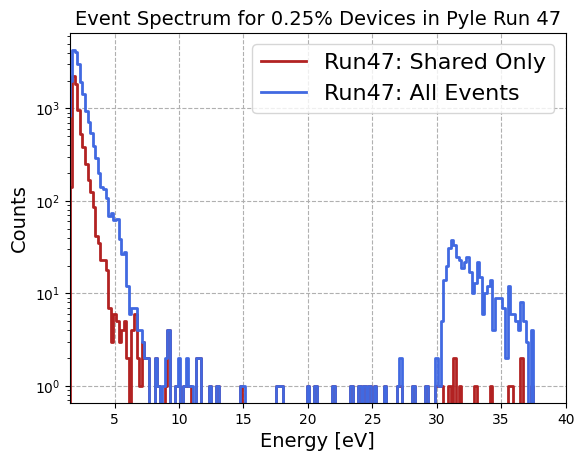

In [4]:
plt.step(sharededges[1:],sharedbins, where='mid',label='Run47: Shared Only',linewidth=2,color='firebrick') #plot the hist and fit together 
plt.step(alledges[1:],allbins, where='mid',label='Run47: All Events',linewidth=2,color='royalblue') #plot the hist and fit together 
plt.yscale('log')
#plt.ylim(1e-4,1e0)
plt.xlim(1.5,40)
plt.title(f'Event Spectrum for 0.25% Devices in Pyle Run 47',fontsize = 14)
plt.ylabel('Counts',fontsize = 14)
plt.xlabel('Energy [eV]',fontsize = 14)
#plt.vlines(2200,ymin=0,ymax=10e5,colors='r', label='cut')
plt.grid(linestyle="dashed")
plt.legend(fontsize = 16)

In [5]:
energyrange_shared = np.arange(bigfinsshared_kev.min(), bigfinsshared_kev.max(),5e-4)
energyrange_all = np.arange(bigfinsall_kev.min(), bigfinsall_kev.max(),5e-4)
cutefficiency_shared = np.full(72,0.7954629629629629)#56% cut efficiency
cutefficiency_all = np.full(73,0.7954629629629629)#33% cut efficiency
resolution_shared = 370e-6 #in units of kev. 
threshold_shared = 370e-6 * 5
resolution_all = 370e-6 #in units of kev.
threshold_all = 370e-6 * 5
exposure_r47 = 0.00003#for 180 minutes of data, and lets assume a cm^2 device is 0.24g. So that would be 0.375*0.24e-3 kgday


In [6]:
sig_shared,ol1_shared,ol2_shared = darklim.limit.optimuminterval(bigfinsshared_kev,energyrange_shared,cutefficiency_shared,DMmasses,exposure_r47,res=resolution_shared,verbose=True,hard_threshold=threshold_shared)
sig_all,ol1_all,ol2_all = darklim.limit.optimuminterval(bigfinsall_kev,energyrange_all,cutefficiency_all,DMmasses,exposure_r47,res=resolution_all,verbose=True,hard_threshold=threshold_all)

NameError: name 'DMmasses' is not defined

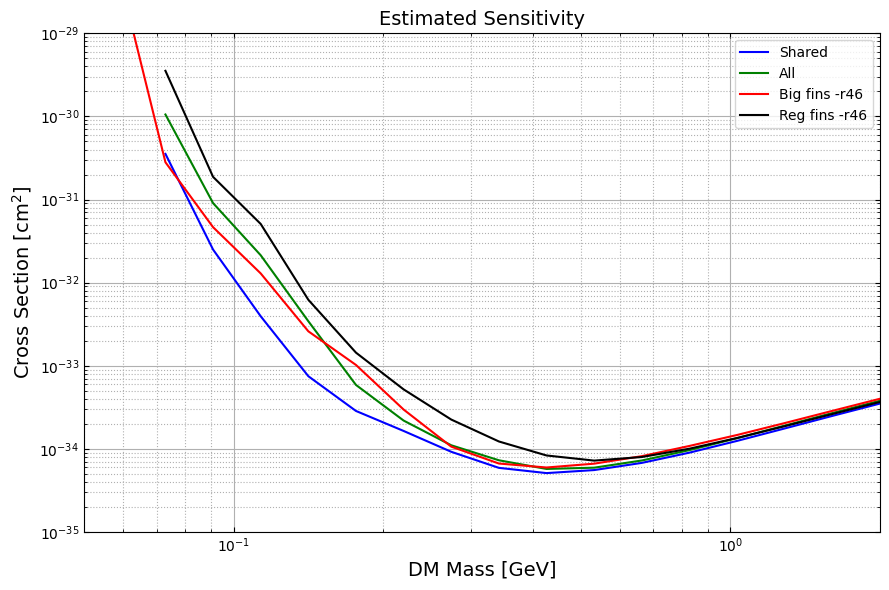

In [27]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.loglog(DMmasses, sig_shared, color='b',label="Shared")
ax.loglog(DMmasses, sig_all, color='g',label="All")
ax.loglog(DMmasses, sig_big, color='r',label="Big fins -r46")
ax.loglog(DMmasses, sig_reg, color='k',label="Reg fins -r46")

ax.set_ylim(1e-35, 1e-29)
ax.set_xlim(0.05, 2)
ax.set_xlabel("DM Mass [GeV]", fontsize=14)
ax.set_ylabel("Cross Section [cm$^2$]", fontsize=14)
ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid()
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)
ax.legend()

fig.tight_layout()

/tmp/ipykernel_2419748/982647761.py:16: RuntimeWarning: All-NaN axis encountered
  result = np.nanmin([result, yinterp], axis=0)


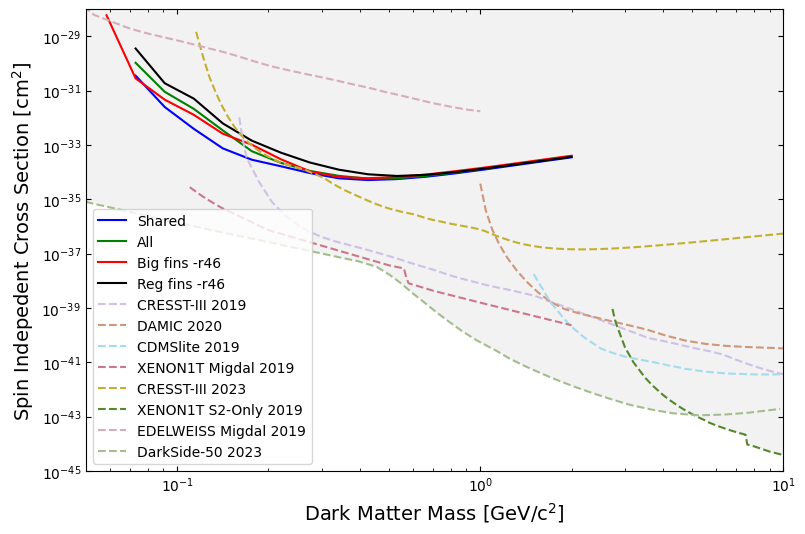

In [28]:
# money plot of sorts... selected run times 
#colors = cmap(np.linspace(0.5, 1, n_lines))

lss = ['--','-.','-']
    
fig, ax = plt.subplots(figsize=(9, 6))
ax.loglog(DMmasses, sig_shared, color='b',label="Shared")
ax.loglog(DMmasses, sig_all, color='g',label="All")
ax.loglog(DMmasses, sig_big, color='r',label="Big fins -r46")
ax.loglog(DMmasses, sig_reg, color='k',label="Reg fins -r46")
plotexcludedsi(ax, details=False)
load_and_plot_existing(ax,leg=False,lw=1.5,leg_params={'loc':'upper right','frameon':False,'handlelength':1.5 } )
#ax.set_title('{:0.1f} g LHe; {:0.0f} days; {:0.1f} g-day'.format(mass_det*1e3,times[i],mass_det*1e3*times[i]))
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-45, 1e-28)
ax.set_xlim(0.05, 10)
ax.set_xlabel("Dark Matter Mass [GeV/c$^2$]", fontsize=14)
ax.set_ylabel("Spin Indepedent Cross Section [cm$^2$]", fontsize=14)

#ax.grid(lw=0.3,ls='--',color='grey')
#ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)
ax.legend(loc='lower left')

### Let's try and make limits for the other signal models

In [4]:
import darklim.sensitivity._sens_est as sens_est
from darklim import constants
from darklim import elf

In [5]:
energyrange_shared = np.arange(bigfinsshared_kev.min(), bigfinsshared_kev.max(),5e-4)
energyrange_all = np.arange(bigfinsall_kev.min(), bigfinsall_kev.max(),5e-4)
cutefficiency_shared = np.full(72,0.7954629629629629)#56% cut efficiency
cutefficiency_all = np.full(73,0.7954629629629629)#33% cut efficiency
resolution_shared = 370e-6 #in units of kev. 
threshold_shared = 370e-6 * 5
resolution_all = 370e-6 #in units of kev.
threshold_all = 370e-6 * 5
exposure_r47 = 0.00003#for 180 minutes of data, and lets assume a cm^2 device is 0.24g. So that would be 0.375*0.24e-3 kgday

In [6]:
elf_params={'mediator': 'massless', 'kcut': 0, 'method': 'grid', 'withscreening': True, 'suppress_darkelf_output': True}
DMmasses = np.geomspace(0.01, 2, num=2)

In [7]:
mX_arr_eV = np.array([1e6, 3e6])#np.array([1e6, 3e6 ,1e7, 3e7, 1e8, 3e8, 1e9, 3e9, 1e10])
spectra = darklim.limit._limit.drde_darkelf(mX_arr_eV,elf_model='electron', elf_params=elf_params, elf_target='Si')

In [8]:
resolution_shared = 370e-6 #in units of kev. 
threshold_shared = 370e-6 * 5
elow = max(threshold_shared, min(energyrange_shared))
ehigh = max(energyrange_shared)
en_interp = np.geomspace(elow, ehigh, int(1e4))
keV_arr = np.geomspace(1e-5, 100e-3, 1000)

In [9]:
# this won't solve the problem - I need to write a different OI function that will take in the elf drde functions. Maybe Vetri can think of something
ratespectrum = []
for i,mass in enumerate(mX_arr_eV):
    print(i)
    spectra_new = darklim.limit._limit.drde_darkelf([mass],elf_model='electron', elf_params=elf_params, elf_target='Si')
    q_rate  = spectra_new[0](en_interp)
    init_rate = darklim.limit._limit.gauss_smear(en_interp, q_rate, resolution_shared, gauss_width=10)
    ratespectrum.append(init_rate)
    

0
1


In [10]:
ratespectrum

[array([1.17190141e-08, 1.17330144e-08, 1.17470187e-08, ...,
        4.81225019e-12, 4.70060822e-12, 4.58897362e-12]),
 array([3.90633806e-09, 3.91100482e-09, 3.91567293e-09, ...,
        1.60408344e-12, 1.56686945e-12, 1.52965792e-12])]

In [11]:
import itertools
flattened = list(itertools.chain.from_iterable(ratespectrum))

In [12]:
sig_elf,ol1_elf,ol2_elf = darklim.limit.optimuminterval(bigfinsshared_kev,energyrange_shared,cutefficiency_shared,mX_arr_eV,exposure_r47,res=resolution_shared,verbose=True,drdefunction=ratespectrum,hard_threshold=threshold_shared,iself=True)

On mass 1 of 2.
iself
[1.17190141e-08 1.17330144e-08 1.17470187e-08 ... 4.81225019e-12
 4.70060822e-12 4.58897362e-12]
[2.79661251e-13 2.79995352e-13 2.80329550e-13 ... 1.14839004e-16
 1.12174792e-16 1.09510756e-16]
[0.00000000e+00 1.55074701e-19 3.10381089e-19 ... 2.28176706e-15
 2.28176831e-15 2.28176954e-15]
2.2817695399087545e-15
202.6916046142578
202.6916046142578
On mass 2 of 2.
iself
[3.90633806e-09 3.91100482e-09 3.91567293e-09 ... 1.60408344e-12
 1.56686945e-12 1.52965792e-12]
[9.32204174e-14 9.33317845e-14 9.34431837e-14 ... 3.82796691e-17
 3.73915985e-17 3.65035865e-17]
[0.00000000e+00 5.16915673e-20 1.03460364e-19 ... 7.60589022e-16
 7.60589441e-16 7.60589850e-16]
7.60589849638802e-16
202.6916046142578
202.6916046142578


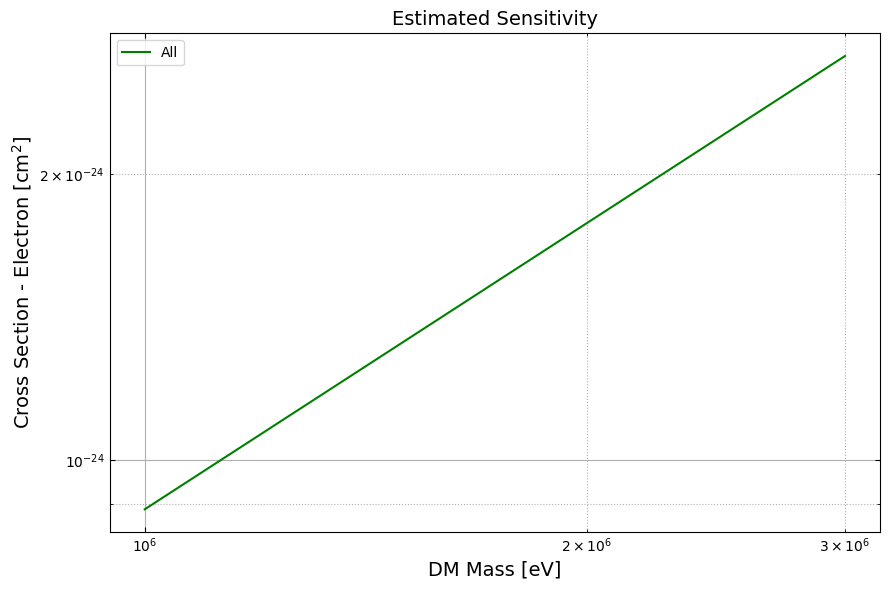

In [13]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.loglog(mX_arr_eV, sig_elf, color='g',label="All")

#ax.set_ylim(1e-35, 1e-29)
#ax.set_xlim(0.05, 2)
ax.set_xlabel("DM Mass [eV]", fontsize=14)
ax.set_ylabel("Cross Section - Electron [cm$^2$]", fontsize=14)
ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid()
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)
ax.legend()

fig.tight_layout()